# Gridsearch to Optimize Model Hyperparameters

This is one of two notebooks in which I run different models through a gridsearch to optimize hyperparameters for recall score. 

In [12]:
import pandas as pd
import reddit_functions as rf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

### Import train and test sets

In [13]:
# import data
X_train = pd.read_csv('../data/train_test_sets/X_train.csv')
X_train = X_train['selftext'] # convert from dataframe to series

X_test = pd.read_csv('../data/train_test_sets/X_test.csv')
X_test = X_test['selftext'] # convert from dataframe to series

y_train = pd.read_csv('../data/train_test_sets/y_train.csv')
y_train = y_train['subreddit'] # convert from dataframe to series

y_test = pd.read_csv('../data/train_test_sets/y_test.csv')
y_test = y_test['subreddit'] # convert from dataframe to series 

### Logistic Regression with CountVectorizer

In [18]:
X_train

0       Decades ago, I was the IT purchasing person fo...
1       I PUT MY TWO WEEKS IN!!!\n\nI AM FINALLY LEAVI...
2       Big Dummy KNEW she stole. Logic just hit his s...
3       I'll start this ventfest by stating the obviou...
4       So, for context, I work at a 3-star-ish busine...
                              ...                        
6914    A long time ago in a land far, far away, your ...
6915    So [this post](https://www.reddit.com/r/talesf...
6916    Happen couple months ago, I went to a client s...
6917    I'm a NA of Florida Hotel in a very touristy l...
6918    Hello again! At the request of others in my la...
Name: selftext, Length: 6919, dtype: object

In [24]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', LogisticRegression())
])

params = {
    'cvec__max_features': [None, 2500, 3000],
    'cvec__max_df': [.8, .7, 1.0],
    'cvec__stop_words':['english', None],
    'model__C' : [1, 0.1, 0.01],
    'model__solver': ['liblinear'],
    'model__penalty': ['l1', 'l2']
}

gs = GridSearchCV(pipe, params, cv=3, scoring='recall')
gs.fit(X_train, y_train)

print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters:')
gs.best_params_

Best Score: 0.9859649122807017
Best Parameters:


{'cvec__max_df': 0.7,
 'cvec__max_features': None,
 'cvec__stop_words': None,
 'model__C': 0.1,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [25]:
gs.score(X_test, y_test)

0.9863574351978172

In [26]:
gs.score(X_train, y_train)

0.9994152046783625

In [27]:
preds_logreg = gs.predict(X_test)

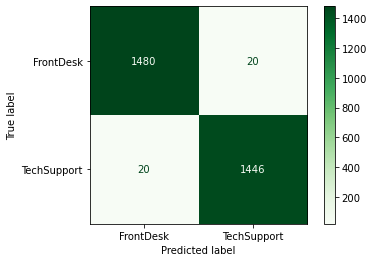

In [28]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['FrontDesk', 'TechSupport'], cmap='Greens');

### Logistic Regression with TF-IDF Vectorizer

In [29]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('model', LogisticRegression())
])

params = {
    'tvec__max_features': [None, 2500, 3000],
    'tvec__max_df': [.8, .7, 1.0],
    'tvec__stop_words':['english', None],
    'model__C' : [1, 0.1, 0.01],
    'model__solver': ['liblinear'],
    'model__penalty': ['l1', 'l2']
}

gs = GridSearchCV(pipe, params, cv=3, scoring='recall')
gs.fit(X_train, y_train)

print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters:')
gs.best_params_

Best Score: 0.9900584795321637
Best Parameters:


{'model__C': 1,
 'model__penalty': 'l2',
 'model__solver': 'liblinear',
 'tvec__max_df': 0.8,
 'tvec__max_features': None,
 'tvec__stop_words': 'english'}

In [30]:
gs.score(X_test, y_test)

0.9911323328785812

In [31]:
preds_logreg_tvec = gs.predict(X_test)

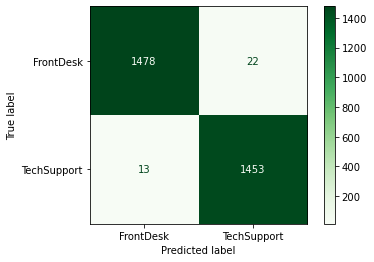

In [32]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['FrontDesk', 'TechSupport'], cmap='Greens');

## Support Vector Machine with CountVectorizer

0.9760083215260449


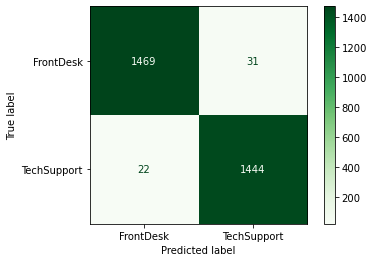

In [18]:
pipe_svm = Pipeline([
    ('cvec', CountVectorizer()),
    ('svm', SVC())
])

params_svm = {
    'cvec__max_features': [None, 2500, 3000, 3500],
    'cvec__max_df': [.8, .7, 1.0],
    'cvec__stop_words':['english', None],
    'svm__kernel': ['poly', 'rbf', 'sigmoid']
}

gs_svm = GridSearchCV(pipe_svm, params_svm)
gs_svm.fit(X_train, y_train)
print(gs_svm.best_score_)


plot_confusion_matrix(gs_svm, X_test, y_test, display_labels=['FrontDesk', 'TechSupport'], cmap='Greens');

In [19]:
gs_svm.best_params_

{'cvec__max_df': 0.8,
 'cvec__max_features': 2500,
 'cvec__stop_words': None,
 'svm__kernel': 'rbf'}

In [20]:
gs_svm.score(X_test, y_test)

0.9821308159136884

In [21]:
preds_svm_cvec = gs_svm.predict(X_test)

## Support Vector Machine with TF-IDF Vectorizer

0.988582247689742


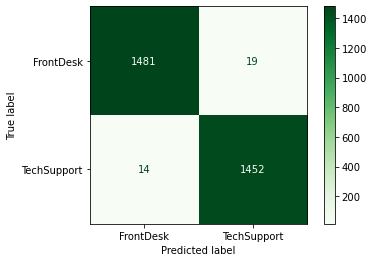

In [22]:
pipe_svm = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svm', SVC())
])

params_svm = {
    'tvec__max_features': [None, 2500, 3000, 3500],
    'tvec__max_df': [.8, .7, 1.0],
    'tvec__stop_words':['english', None],
    'svm__kernel': ['poly', 'rbf', 'sigmoid']
}

gs_svm = GridSearchCV(pipe_svm, params_svm)
gs_svm.fit(X_train, y_train)
print(gs_svm.best_score_)


plot_confusion_matrix(gs_svm, X_test, y_test, display_labels=['FrontDesk', 'TechSupport'], cmap='Greens');

In [23]:
gs_svm.best_params_

{'svm__kernel': 'sigmoid',
 'tvec__max_df': 0.7,
 'tvec__max_features': None,
 'tvec__stop_words': 'english'}

In [24]:
gs_svm.score(X_test, y_test)

0.9888739042481457

In [25]:
preds_svm_tvec = gs_svm.predict(X_test)

### Put all predictions into a dataframe and save to csv

In [27]:
predictions = pd.DataFrame({
    'X_test': X_test,
    'y_true': y_test,
    'y_logreg_cvec': preds_logreg,
    'y_logreg_tvec': preds_logreg_tvec,
    'y_svm_cvec' : preds_svm_cvec,
    'y_svm_tvec': preds_svm_tvec
})

predictions.head()

,X_test,y_true,y_logreg_cvec,y_logreg_tvec,y_svm_cvec,y_svm_tvec
0,Once upon a time it was a normal day at the ai...,0,0,0,0,0
1,I once worked as a programmer for a company th...,1,1,1,1,1
2,To set the scene: I'm genderqueer. Born with b...,0,0,0,0,0
3,"So, it won't let me edit the previous post, so...",0,0,0,0,0
4,"At $Hospital, we used $WellKnownBrand printers...",1,1,1,1,1


In [3]:
predictions.to_csv('../data/predictions/predictions_all_data.csv', index=False)

NameError: name 'predictions' is not defined